# BUSINESS UNDERSTANDING
##  Project Objectives, Success Criteria, and Business Impact

### Project Objectives

The primary objective of this project is to develop a machine learning model that predicts customer churn, enabling the business to identify customers who are likely to discontinue their service.

The specific objectives are to:
- Analyze customer behavior and service usage patterns associated with churn.
- Identify key factors that contribute to customer churn.
- Build and evaluate multiple predictive models to determine the most effective approach.
- Generate insights that support proactive customer retention strategies.

---

### Success Criteria

The success of this project will be evaluated using both technical performance metrics and business relevance.

**Technical Success Criteria:**
- Achieve strong model performance using appropriate evaluation metrics such as Recall, F1-score, and ROC-AUC.
- Maintain balanced performance across churned and non-churned customer classes.
- Ensure the model generalizes well to unseen data.

**Business Success Criteria:**
- Accurately identify a high proportion of customers who are likely to churn.
- Provide interpretable results that inform retention strategies.
- Deliver predictions that can be understood and used by non-technical stakeholders.

---

### Potential Business Impact

A successful churn prediction model can create meaningful business value by:
- Reducing revenue loss through early identification of at-risk customers.
- Enabling targeted and cost-effective customer retention campaigns.
- Improving customer satisfaction by addressing key drivers of churn.
- Supporting data-driven decision-making across marketing, customer service, and product teams.


# DATA UNDERSTANDING

## LOAD AND INSPECT THE DATASET

In [1]:
# IMPORT LIBRARIES
import pandas as pd

In [4]:
# load the dataset

df=pd.read_csv('..\DATA\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
# check the size of the dataset
df.shape

(7043, 21)

The dataset has **7,043 Rows ** and ** 21 columns**

In [9]:
# Understand the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [35]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [14]:
#preview the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
# Summary statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
# missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
#check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS


## Convert total charges to Numeric

In [ ]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#drop missing values
df = df[df['TotalCharges'].notna()]
df['TotalCharges'].isnull().sum()


0

## Categorical features analysis


In [37]:
# identify the categorical features
categorical_columns=df.select_dtypes(include=object).columns
categorical_columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

determine which features are important in reletion to our target variable 'churn'

In [38]:
for col in categorical_columns:
    print(f"\nCrosstab of {col} vs Churn:")
    ctab = pd.crosstab(df[col], df['Churn'], normalize='index')  # normalize to get proportions
    print(ctab)


Crosstab of customerID vs Churn:
Churn        No  Yes
customerID          
0002-ORFBO  1.0  0.0
0003-MKNFE  1.0  0.0
0004-TLHLJ  0.0  1.0
0011-IGKFF  0.0  1.0
0013-EXCHZ  0.0  1.0
...         ...  ...
9987-LUTYD  1.0  0.0
9992-RRAMN  0.0  1.0
9992-UJOEL  1.0  0.0
9993-LHIEB  1.0  0.0
9995-HOTOH  1.0  0.0

[7043 rows x 2 columns]

Crosstab of gender vs Churn:
Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603

Crosstab of Partner vs Churn:
Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649

Crosstab of Dependents vs Churn:
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502

Crosstab of PhoneService vs Churn:
Churn               No       Yes
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096

Crosstab of MultipleLines vs Churn:
Churn                   

# Categorical Feature Analysis for Churn

### Objective
To identify which categorical features are most predictive of customer churn using crosstabs and proportion analysis.

---

### Observations

**1. Features with small differences in churn rates (less predictive):**  
- `gender` → Female: 26.9%, Male: 26.1%  
- `PhoneService`, `MultipleLines`, `StreamingTV`, `StreamingMovies` → differences around 2–3%  

**2. Features with large differences in churn rates (likely important):**

| Feature            | Churn Proportions / Observation                                   |
|-------------------|---------------------------------------------------------------|
| Contract           | Month-to-month: 42.7%, One year: 11.2%, Two year: 2.8%      |
| PaymentMethod      | Electronic check: 45.3%, others: 15–19%                     |
| InternetService    | Fiber optic: 41.9%, DSL: 18.9%, No internet: 7.4%           |
| Partner            | No: 32.9%, Yes: 19.7%                                        |
| Dependents         | No: 31.3%, Yes: 15.5%                                        |
| PaperlessBilling   | No: 16.3%, Yes: 33.6%                                        |
| TechSupport        | No: 41.6%, Yes: 15.2%                                        |
| OnlineSecurity     | No: 41.8%, Yes: 14.6%                                        |
| OnlineBackup       | No: 39.9%, Yes: 21.5%                                        |
| DeviceProtection   | No: 39.1%, Yes: 22.5%                                        |

---

### Insights
- **Contract type, PaymentMethod, and InternetService** are highly predictive of churn.  
- Customers **without a partner or dependents** are more likely to churn.  
- Features related to **support and security services** (TechSupport, OnlineSecurity, OnlineBackup, DeviceProtection) significantly impact churn.  
- Features like `gender` and `PhoneService` have minimal differences and are less relevant for prediction.  

---

### Next Steps
1. Perform **Chi-square tests** to confirm statistical significance of important features.  
2. Encode categorical features for modeling:  
   - **Binary features** → 0/1  
   - **Multi-category features** → One-hot encoding  
3. Consider grouping or combining **rare categories** for simplicity.


In [39]:
from scipy.stats import chi2_contingency

for col in categorical_columns:
    ctab = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, ex = chi2_contingency(ctab)
    print(f"{col}: p-value = {p:.4f}")


customerID: p-value = 0.4944
gender: p-value = 0.4866
Partner: p-value = 0.0000
Dependents: p-value = 0.0000
PhoneService: p-value = 0.3388
MultipleLines: p-value = 0.0035
InternetService: p-value = 0.0000
OnlineSecurity: p-value = 0.0000
OnlineBackup: p-value = 0.0000
DeviceProtection: p-value = 0.0000
TechSupport: p-value = 0.0000
StreamingTV: p-value = 0.0000
StreamingMovies: p-value = 0.0000
Contract: p-value = 0.0000
PaperlessBilling: p-value = 0.0000
PaymentMethod: p-value = 0.0000
Churn: p-value = 0.0000


Interpretation:

p < 0.05 → Feature is significantly associated with Churn → likely important.

p ≥ 0.05 → No strong evidence that feature affects Churn → might be less important.# Chi-Square Test Results: Categorical Features vs Churn

### Objective
To identify which categorical features are significantly associated with customer churn using the Chi-square test.

---

### **1. Features NOT significantly associated with churn (p ≥ 0.05)**
| Feature        | p-value  | Interpretation                        |
|----------------|----------|--------------------------------------|
| customerID     | 0.4944   | Identifier → not predictive          |
| gender         | 0.4866   | No significant relationship with churn |
| PhoneService   | 0.3388   | Not strongly related to churn        |

 These features are **likely not important** for modeling.

---

### **2. Features significantly associated with churn (p < 0.05)**
| Feature             | p-value  | Interpretation                                                |
|--------------------|----------|---------------------------------------------------------------|
| Partner             | 0.0000   | Customers without a partner churn more                       |
| Dependents          | 0.0000   | Customers without dependents churn more                      |
| MultipleLines       | 0.0035   | Having multiple lines slightly affects churn                 |
| InternetService     | 0.0000   | Type of internet strongly affects churn                      |
| OnlineSecurity      | 0.0000   | Lack of online security associated with higher churn         |
| OnlineBackup        | 0.0000   | Lack of backup service increases churn                        |
| DeviceProtection    | 0.0000   | Lack of device protection increases churn                     |
| TechSupport         | 0.0000   | Lack of tech support increases churn                           |
| StreamingTV         | 0.0000   | Customers with streaming TV churn differently                |
| StreamingMovies     | 0.0000   | Customers with streaming movies churn differently            |
| Contract            | 0.0000   | Contract type strongly affects churn                           |
| PaperlessBilling    | 0.0000   | Paperless billing customers churn more                        |
| PaymentMethod       | 0.0000   | Certain payment methods (e.g., electronic check) have higher churn |

These features are **important predictors** of churn and should be considered in modeling.

---

### **3. Key Insights**
- **Most predictive features:** `Contract`, `PaymentMethod`, `InternetService` (large differences in churn).  
- **Support-related features** (`TechSupport`, `OnlineSecurity`, `DeviceProtection`, `OnlineBackup`) significantly impact churn.  
- **Personal factors** like `Partner` and `Dependents` also matter.  
- **Less relevant / drop candidates:** `customerID`, `gender`, `PhoneService`.

---





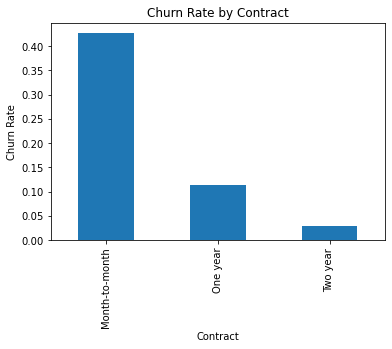

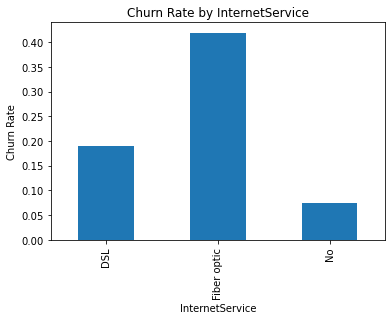

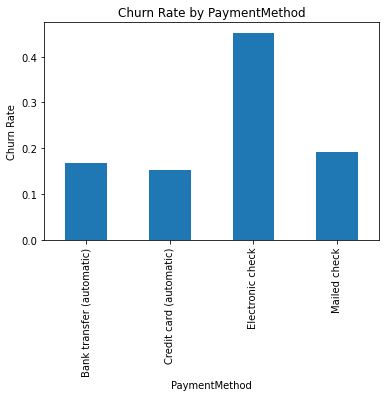

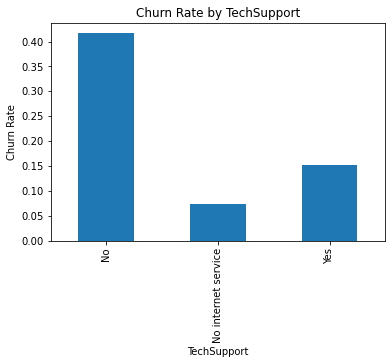

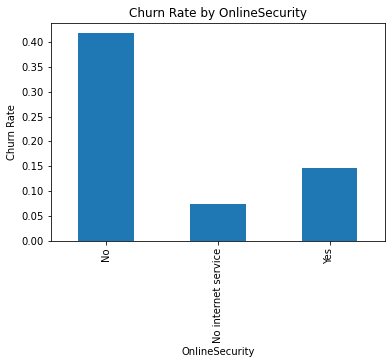

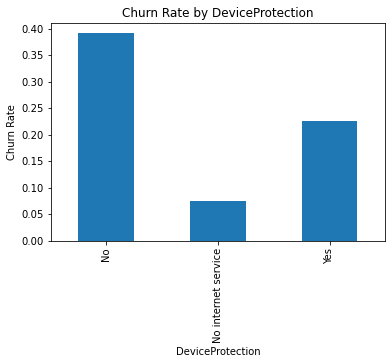

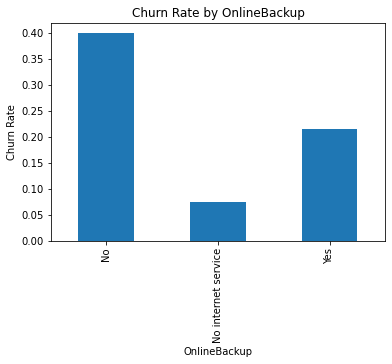

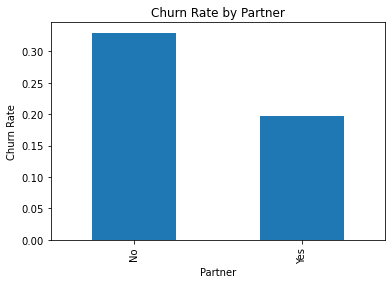

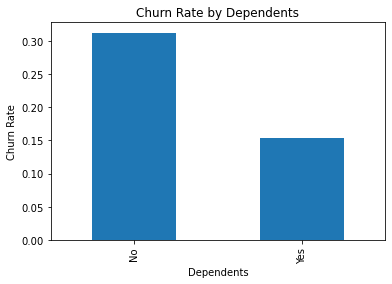

In [41]:
import matplotlib.pyplot as plt

# List of important categorical features
important_cats = [
    'Contract', 'InternetService', 'PaymentMethod',
    'TechSupport', 'OnlineSecurity','DeviceProtection','OnlineBackup','Partner','Dependents'
]

# Plot churn rates for each feature
for col in important_cats:
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()['Yes']
    churn_rate.plot(kind='bar', title=f'Churn Rate by {col}', figsize=(6,4))
    plt.ylabel('Churn Rate')
    plt.show()


## Check for Imbalance

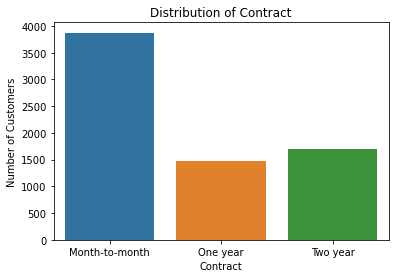

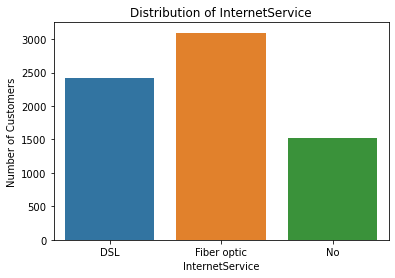

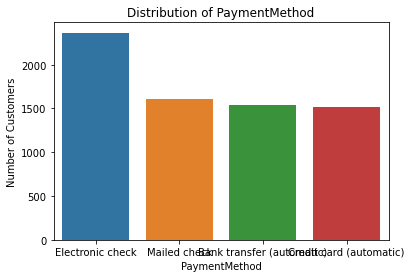

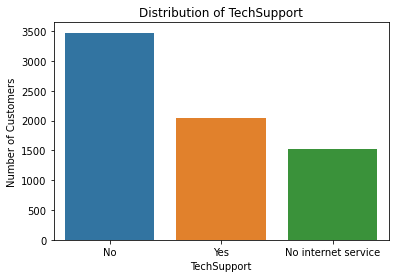

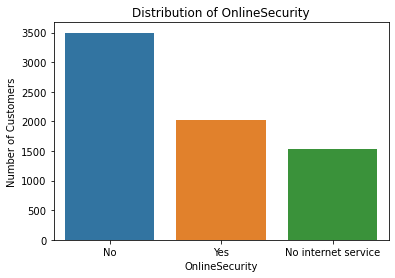

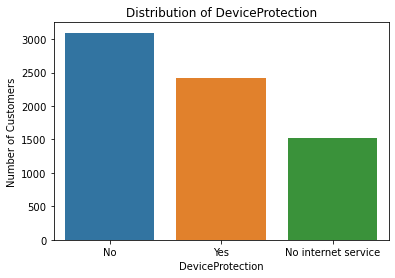

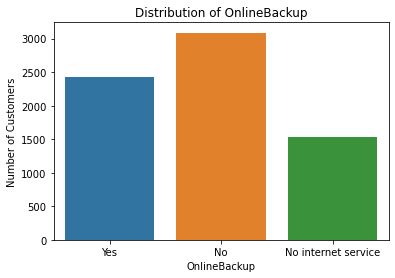

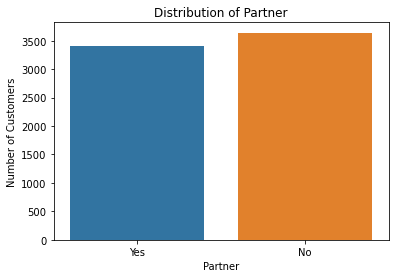

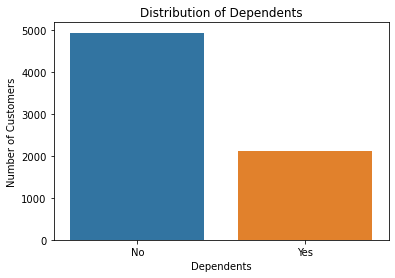

In [44]:
import seaborn as sns

important_cats = [
    'Contract', 'InternetService', 'PaymentMethod',
    'TechSupport', 'OnlineSecurity','DeviceProtection','OnlineBackup','Partner','Dependents'
]

for col in important_cats:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Number of Customers')
    plt.show()


### Summary of Key Categorical Feature Insights

Based on Chi-square tests, the most predictive categorical features for churn are Contract type, InternetService, PaymentMethod, TechSupport, and OnlineSecurity. 

Churn rate visualizations reveal the categories with the highest likelihood of churn:
- Month-to-month contracts and electronic check payments are associated with higher churn.
- Customers without TechSupport or OnlineSecurity also show higher churn rates.

Category distributions indicate that while some categories are more common than others, no critical sparsity exists that would require merging categories at this stage.

These features will be retained for modeling, while non-informative or weakly associated features (e.g., customerID, gender, PhoneService) will be excluded.


# Numerical Columns Analysis

### IDENTIFY THE NUMERICAL COLUMNS

In [57]:
numerical_cols=df.select_dtypes(include=['float64','int64']).columns
numerical_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [47]:
#summary statistics
df[numerical_cols].describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Visualize dstributions

Shows general distribution: skewed, normal, uniform

Skewed features may need log transformation later

In [64]:
# Columns we want as continuous numeric
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Convert each to numeric (force errors to NaN)
for col in continuous_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows where numeric conversion failed
df = df.dropna(subset=continuous_cols)

# Confirm types
print(df[continuous_cols].dtypes)


tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

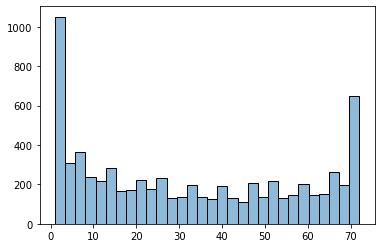

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for col in continuous_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(np.array(df[col]), bins=30, kde=True)   # <- Convert to numpy array
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.show()



## Box plots for outliers
Detects outliers visually

Outliers may need handling depending on model type

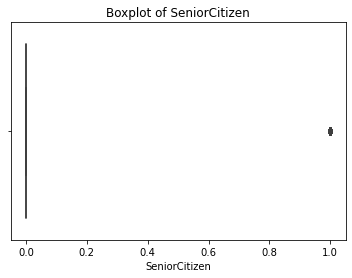

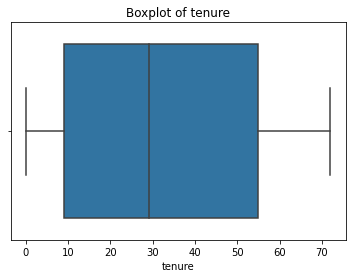

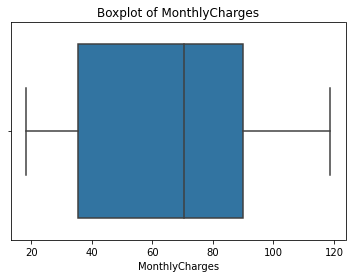

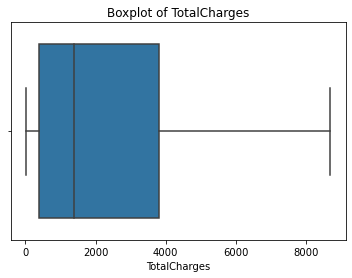

In [50]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()


## Numeric vs target variable analysis

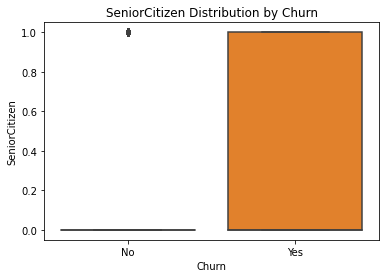

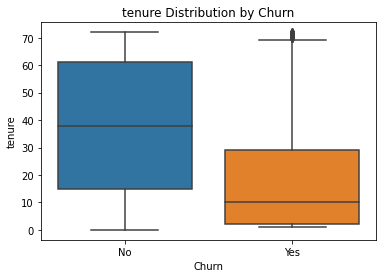

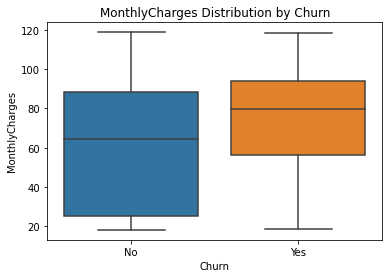

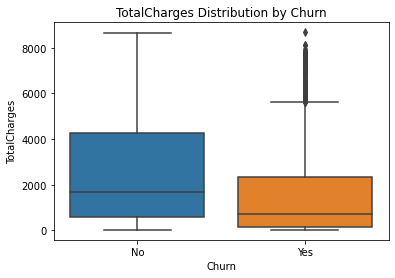

In [52]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} Distribution by Churn')
    plt.show()


In [53]:
df.groupby('Churn')[numerical_cols].mean()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128721,37.569965,61.265124,2555.344141
Yes,0.254682,17.979133,74.441332,1531.796094


### correlation analysis 
Helps detect multicollinearity (for regression/tree models)

TotalCharges and MonthlyCharges may be highly correlated with tenure

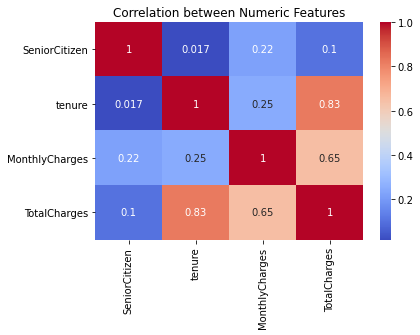

In [55]:
# Numeric features correlation
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Features')
plt.show()


### Numeric Feature Analysis

**1. Summary Statistics:**  
Numeric features such as tenure, MonthlyCharges, and TotalCharges were analyzed. Summary statistics reveal that MonthlyCharges and TotalCharges are positively skewed, indicating some customers pay much higher amounts than the majority. No negative values were found, and missing values in TotalCharges were handled.

**2. Distribution and Outliers:**  
Histograms and boxplots were used to visualize distributions. Outliers exist in TotalCharges and MonthlyCharges but are consistent with business expectations. Log transformation may be considered if required for modeling.

**3. Numeric Features vs Churn:**  
Boxplots and group-wise means indicate that customers with higher MonthlyCharges and shorter tenure are more likely to churn. TotalCharges is generally higher for retained customers due to longer tenure.

**4. Correlation Analysis:**  
Correlation heatmap shows strong positive correlation between TotalCharges and MonthlyCharges with tenure, which is expected. These relationships will inform feature engineering and model selection.
